In [3]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point  # Import the Point class
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#CO - NEED

aq_co_path ='/mnt/c/Users/court/Documents/d3m_project/data/epa_aq_data/epa_aq_data_CO'

# File paths
aq_co_2016_file = aq_co_path + '/epa_aq_data_CO_2016.csv'
aq_co_2017_file = aq_co_path + '/epa_aq_data_CO_2017.csv'
aq_co_2018_file = aq_co_path + '/epa_aq_data_CO_2018.csv'
aq_co_2019_file = aq_co_path + '/epa_aq_data_CO_2019.csv'
aq_co_2020_file = aq_co_path + '/epa_aq_data_CO_2020.csv'
aq_co_2021_file = aq_co_path + '/epa_aq_data_CO_2021.csv'
aq_co_2022_file = aq_co_path + '/epa_aq_data_CO_2022.csv'
aq_co_2023_file = aq_co_path + '/epa_aq_data_CO_2023.csv'
aq_co_2024_file = aq_co_path + '/epa_aq_data_CO_2024.csv'

aq_co_2016_tract_file = aq_co_path + '/epa_aq_CO_2016_tract.csv'
aq_co_2017_tract_file = aq_co_path + '/epa_aq_CO_2017_tract.csv'
aq_co_2018_tract_file = aq_co_path + '/epa_aq_CO_2018_tract.csv'
aq_co_2019_tract_file = aq_co_path + '/epa_aq_CO_2019_tract.csv'
aq_co_2020_tract_file = aq_co_path + '/epa_aq_CO_2020_tract.csv'
aq_co_2021_tract_file = aq_co_path + '/epa_aq_CO_2021_tract.csv'
aq_co_2022_tract_file = aq_co_path + '/epa_aq_CO_2022_tract.csv'
aq_co_2023_tract_file = aq_co_path + '/epa_aq_CO_2023_tract.csv'
aq_co_2024_tract_file = aq_co_path + '/epa_aq_CO_2024_tract.csv'

In [19]:
# census tracts w/ corresponding CO aq stations
aq_co_tract_2016 = pd.read_csv(aq_co_2016_tract_file)
aq_co_tract_2017 = pd.read_csv(aq_co_2017_tract_file)
aq_co_tract_2018 = pd.read_csv(aq_co_2018_tract_file)
aq_co_tract_2019 = pd.read_csv(aq_co_2019_tract_file)
aq_co_tract_2020 = pd.read_csv(aq_co_2020_tract_file)
aq_co_tract_2021 = pd.read_csv(aq_co_2021_tract_file)
aq_co_tract_2022 = pd.read_csv(aq_co_2022_tract_file)
aq_co_tract_2023 = pd.read_csv(aq_co_2023_tract_file)
aq_co_tract_2024 = pd.read_csv(aq_co_2024_tract_file)

In [11]:
print(aq_co_tract_2021)

     tl_2024_25_tract_STATEFP  tl_2024_25_tract_COUNTYFP  \
0                         NaN                         25   
1                         NaN                         25   
2                         NaN                         25   
3                         NaN                         25   
4                         NaN                         25   
..                        ...                        ...   
309                       NaN                         17   
310                       NaN                         17   
311                       NaN                         17   
312                       NaN                         17   
313                       NaN                         17   

     tl_2024_25_tract_TRACTCE  tl_2024_25_tract_GEOID  \
0                       91300                       0   
1                      110501                       0   
2                       30500                       0   
3                       10500                      

In [9]:
# CO aq data
aq_co_2016 = pd.read_csv(aq_co_2016_file)
aq_co_2017 = pd.read_csv(aq_co_2017_file)
aq_co_2018 = pd.read_csv(aq_co_2018_file)
aq_co_2019 = pd.read_csv(aq_co_2019_file)
aq_co_2020 = pd.read_csv(aq_co_2020_file)
aq_co_2021 = pd.read_csv(aq_co_2021_file)
aq_co_2022 = pd.read_csv(aq_co_2022_file)
aq_co_2023 = pd.read_csv(aq_co_2023_file)
aq_co_2024 = pd.read_csv(aq_co_2024_file)

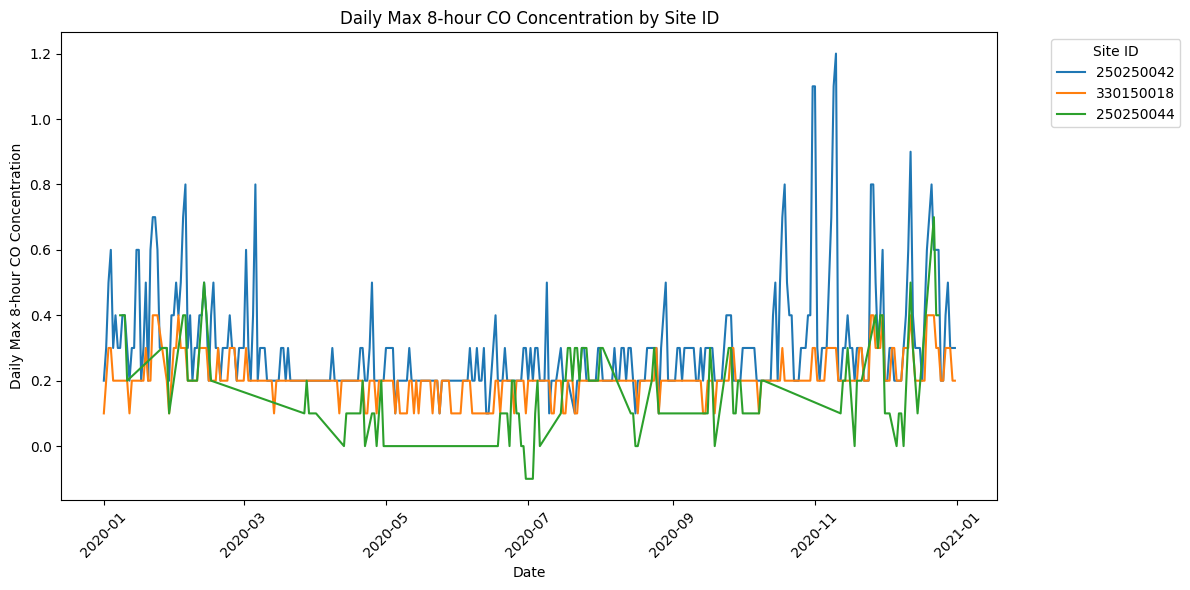

In [ ]:
aq_co_2020['Date'] = pd.to_datetime(aq_co_2020['Date'])

# Sort the dataframe by 'Date' to ensure the plot is in chronological order
aq_co_2020.sort_values('Date', inplace=True)

# Create a color map based on 'Site ID'
unique_sites = aq_co_2020['Site ID'].unique()
color_map = {site: f'C{i}' for i, site in enumerate(unique_sites)}

# Plot the data
plt.figure(figsize=(12, 6))

for site, color in color_map.items():
    site_data = aq_co_2020[aq_co_2020['Site ID'] == site]
    plt.plot(site_data['Date'], site_data['Daily Max 8-hour CO Concentration'], 
             label=site, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour CO Concentration')
plt.title('Daily Max 8-hour CO Concentration by Site ID')
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Combine all dataframes into one
aq_co_combined = pd.concat(
    [aq_co_2016, aq_co_2017, aq_co_2018, aq_co_2019, aq_co_2020, 
     aq_co_2021, aq_co_2022, aq_co_2023, aq_co_2024],
    axis=0,  # Concatenate vertically (stack rows)
    ignore_index=True  # Reset the index in the combined dataframe
)

# Display the combined dataframe
print(aq_co_combined.head())

         Date Source    Site ID  POC  Daily Max 8-hour CO Concentration Units  \
0  01/01/2016    AQS  250092006    1                                0.2   ppm   
1  01/02/2016    AQS  250092006    1                                0.2   ppm   
2  01/03/2016    AQS  250092006    1                                0.2   ppm   
3  01/04/2016    AQS  250092006    1                                0.2   ppm   
4  01/05/2016    AQS  250092006    1                                0.3   ppm   

   Daily AQI Value             Local Site Name  Daily Obs Count  \
0                2  LYNN WATER TREATMENT PLANT               12   
1                2  LYNN WATER TREATMENT PLANT               24   
2                2  LYNN WATER TREATMENT PLANT               24   
3                2  LYNN WATER TREATMENT PLANT               24   
4                3  LYNN WATER TREATMENT PLANT               24   

   Percent Complete  ...  AQS Parameter Description Method Code  CBSA Code  \
0              50.0  ...        

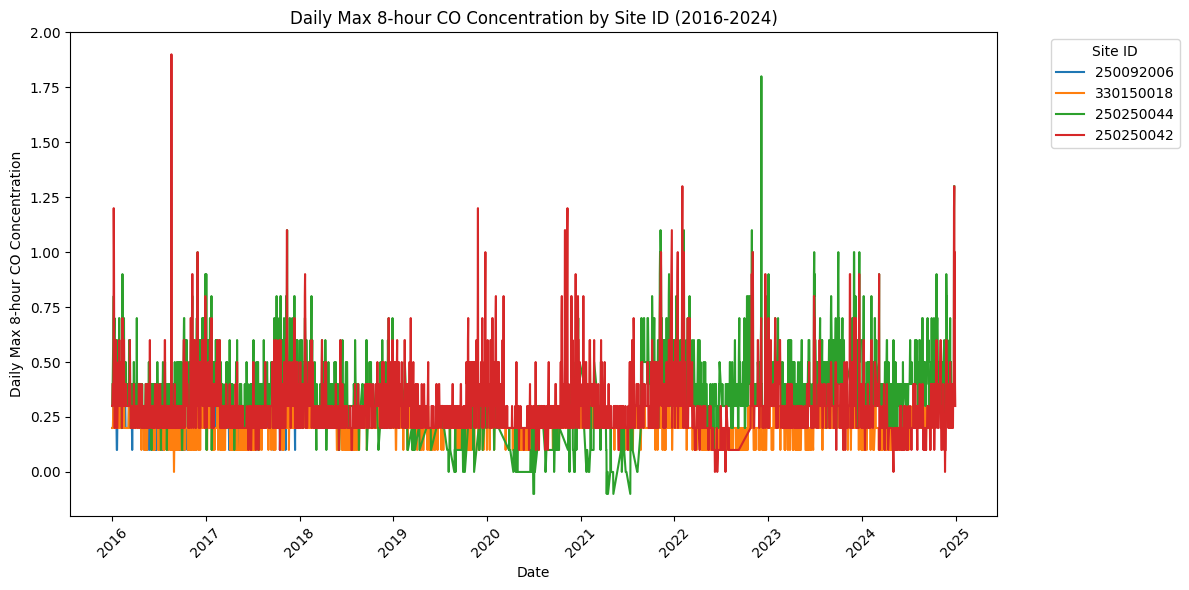

In [12]:
aq_co_combined['Date'] = pd.to_datetime(aq_co_combined['Date'])

# Sort the dataframe by 'Date' to ensure the plot is in chronological order
aq_co_combined.sort_values('Date', inplace=True)

# Create a color map based on 'Site ID'
unique_sites = aq_co_combined['Site ID'].unique()
color_map = {site: f'C{i}' for i, site in enumerate(unique_sites)}

# Plot the data
plt.figure(figsize=(12, 6))

for site, color in color_map.items():
    site_data = aq_co_combined[aq_co_combined['Site ID'] == site]
    plt.plot(site_data['Date'], site_data['Daily Max 8-hour CO Concentration'], 
             label=site, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour CO Concentration')
plt.title('Daily Max 8-hour CO Concentration by Site ID (2016-2024)')
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

NO2 AQ Data


In [7]:
#NO2 - NEED

aq_no2_path ='/mnt/c/Users/court/Documents/d3m_project/data/epa_aq_data/epa_aq_data_NO2'

# File paths
aq_no2_2016_file = aq_no2_path + '/epa_aq_data_NO2_2016.csv'
aq_no2_2017_file = aq_no2_path + '/epa_aq_data_NO2_2017.csv'
aq_no2_2018_file = aq_no2_path + '/epa_aq_data_NO2_2018.csv'
aq_no2_2019_file = aq_no2_path + '/epa_aq_data_NO2_2019.csv'
aq_no2_2020_file = aq_no2_path + '/epa_aq_data_NO2_2020.csv'
aq_no2_2021_file = aq_no2_path + '/epa_aq_data_NO2_2021.csv'
aq_no2_2022_file = aq_no2_path + '/epa_aq_data_NO2_2022.csv'
aq_no2_2023_file = aq_no2_path + '/epa_aq_data_NO2_2023.csv'
aq_no2_2024_file = aq_no2_path + '/epa_aq_data_NO2_2024.csv'

aq_no2_2016_tract_file = aq_no2_path + '/eq_aq_NO2_2016_tract.csv'
aq_no2_2017_tract_file = aq_no2_path + '/eq_aq_NO2_2017_tract.csv'
aq_no2_2018_tract_file = aq_no2_path + '/eq_aq_NO2_2018_tract.csv'
aq_no2_2019_tract_file = aq_no2_path + '/eq_aq_NO2_2019_tract.csv'
aq_no2_2020_tract_file = aq_no2_path + '/eq_aq_NO2_2020_tract.csv'
aq_no2_2021_tract_file = aq_no2_path + '/eq_aq_NO2_2021_tract.csv'
aq_no2_2022_tract_file = aq_no2_path + '/eq_aq_NO2_2022_tract.csv'
aq_no2_2023_tract_file = aq_no2_path + '/eq_aq_NO2_2023_tract.csv'
aq_no2_2024_tract_file = aq_no2_path + '/eq_aq_NO2_2024_tract.csv'

In [8]:
# census tracts w/ corresponding NO2 aq stations
#aq_no2_tract_2016 = pd.read_csv(aq_no2_2016_tract_file)
aq_no2_tract_2017 = pd.read_csv(aq_no2_2017_tract_file)
aq_no2_tract_2018 = pd.read_csv(aq_no2_2018_tract_file)
aq_no2_tract_2019 = pd.read_csv(aq_no2_2019_tract_file)
aq_no2_tract_2020 = pd.read_csv(aq_no2_2020_tract_file)
aq_no2_tract_2021 = pd.read_csv(aq_no2_2021_tract_file)
aq_no2_tract_2022 = pd.read_csv(aq_no2_2022_tract_file)
aq_no2_tract_2023 = pd.read_csv(aq_no2_2023_tract_file)
aq_no2_tract_2024 = pd.read_csv(aq_no2_2024_tract_file)

In [10]:
# NO2 aq data
aq_no2_2016 = pd.read_csv(aq_no2_2016_file)
aq_no2_2017 = pd.read_csv(aq_no2_2017_file)
aq_no2_2018 = pd.read_csv(aq_no2_2018_file)
aq_no2_2019 = pd.read_csv(aq_no2_2019_file)
aq_no2_2020 = pd.read_csv(aq_no2_2020_file)
aq_no2_2021 = pd.read_csv(aq_no2_2021_file)
aq_no2_2022 = pd.read_csv(aq_no2_2022_file)
aq_no2_2023 = pd.read_csv(aq_no2_2023_file)
aq_no2_2024 = pd.read_csv(aq_no2_2024_file)

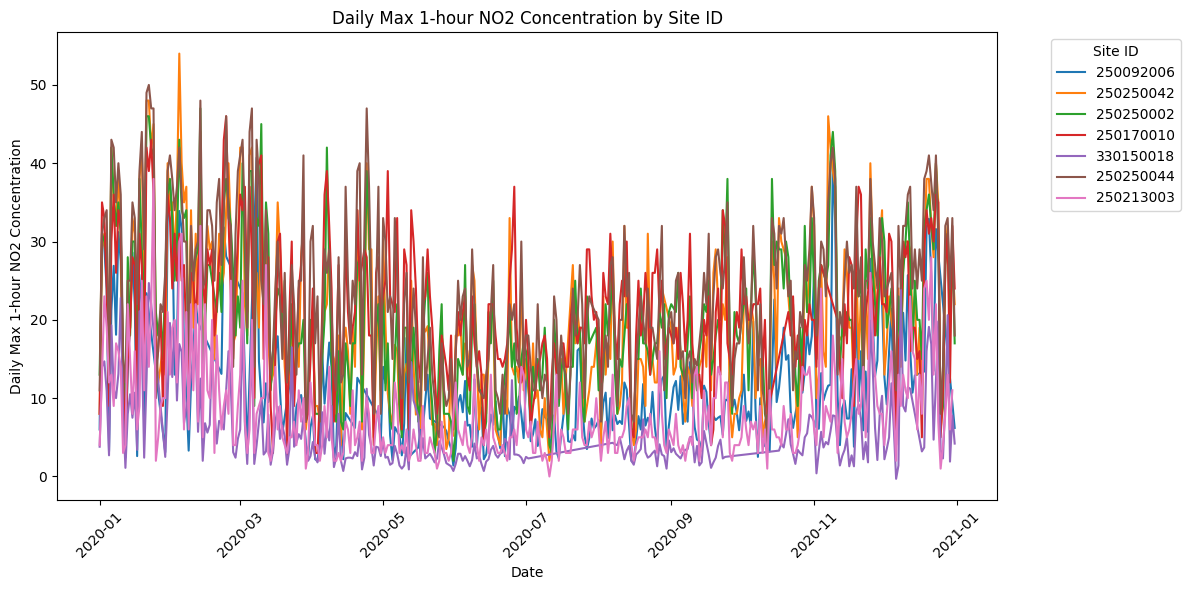

In [12]:
aq_no2_2020['Date'] = pd.to_datetime(aq_no2_2020['Date'])

# Sort the dataframe by 'Date' to ensure the plot is in chronological order
aq_no2_2020.sort_values('Date', inplace=True)

# Create a color map based on 'Site ID'
unique_sites = aq_no2_2020['Site ID'].unique()
color_map = {site: f'C{i}' for i, site in enumerate(unique_sites)}

# Plot the data
plt.figure(figsize=(12, 6))

for site, color in color_map.items():
    site_data = aq_no2_2020[aq_no2_2020['Site ID'] == site]
    plt.plot(site_data['Date'], site_data['Daily Max 1-hour NO2 Concentration'], 
             label=site, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.title('Daily Max 1-hour NO2 Concentration by Site ID')
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Combine all dataframes into one
aq_no2_combined = pd.concat(
    [aq_no2_2016, aq_no2_2017, aq_no2_2018, aq_no2_2019, aq_no2_2020, 
     aq_no2_2021, aq_no2_2022, aq_no2_2023, aq_no2_2024],
    axis=0,  # Concatenate vertically (stack rows)
    ignore_index=True  # Reset the index in the combined dataframe
)

# Display the combined dataframe
print(aq_no2_combined.head())

         Date Source    Site ID  POC  Daily Max 1-hour NO2 Concentration  \
0  01/01/2016    AQS  250092006    1                                10.0   
1  01/02/2016    AQS  250092006    1                                 8.0   
2  01/03/2016    AQS  250092006    1                                11.0   
3  01/09/2016    AQS  250092006    1                                18.0   
4  01/10/2016    AQS  250092006    1                                12.0   

  Units  Daily AQI Value             Local Site Name  Daily Obs Count  \
0   ppb                9  LYNN WATER TREATMENT PLANT               22   
1   ppb                8  LYNN WATER TREATMENT PLANT               24   
2   ppb               10  LYNN WATER TREATMENT PLANT               24   
3   ppb               17  LYNN WATER TREATMENT PLANT               23   
4   ppb               11  LYNN WATER TREATMENT PLANT               18   

   Percent Complete  ...  AQS Parameter Description Method Code  CBSA Code  \
0              92.0  ...  

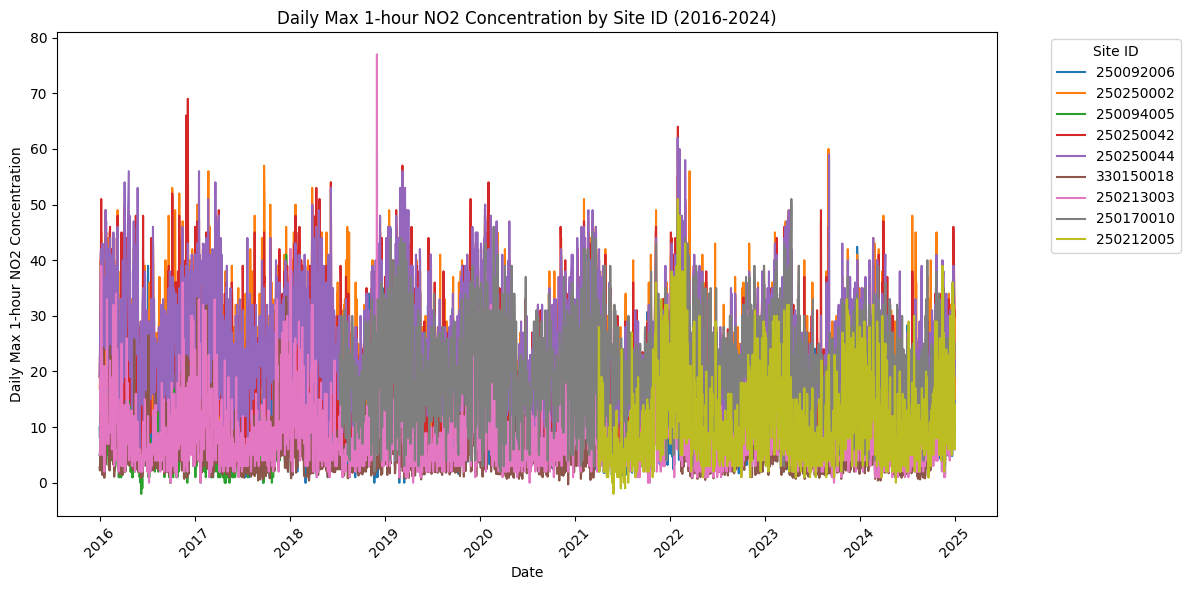

In [14]:
aq_no2_combined['Date'] = pd.to_datetime(aq_no2_combined['Date'])

# Sort the dataframe by 'Date' to ensure the plot is in chronological order
aq_no2_combined.sort_values('Date', inplace=True)

# Create a color map based on 'Site ID'
unique_sites = aq_no2_combined['Site ID'].unique()
color_map = {site: f'C{i}' for i, site in enumerate(unique_sites)}

# Plot the data
plt.figure(figsize=(12, 6))

for site, color in color_map.items():
    site_data = aq_no2_combined[aq_no2_combined['Site ID'] == site]
    plt.plot(site_data['Date'], site_data['Daily Max 1-hour NO2 Concentration'], 
             label=site, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.title('Daily Max 1-hour NO2 Concentration by Site ID (2016-2024)')
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Ozone

In [5]:
#Ozone - NEED

aq_ozone_path ='/mnt/c/Users/court/Documents/d3m_project/data/epa_aq_data/epa_aq_data_Ozone'

# File paths
aq_ozone_2016_file = aq_ozone_path + '/epa_aq_data_Ozone_2016.csv'
aq_ozone_2017_file = aq_ozone_path + '/epa_aq_data_Ozone_2017.csv'
aq_ozone_2018_file = aq_ozone_path + '/epa_aq_data_Ozone_2018.csv'
aq_ozone_2019_file = aq_ozone_path + '/epa_aq_data_Ozone_2019.csv'
aq_ozone_2020_file = aq_ozone_path + '/epa_aq_data_Ozone_2020.csv'
aq_ozone_2021_file = aq_ozone_path + '/epa_aq_data_Ozone_2021.csv'
aq_ozone_2022_file = aq_ozone_path + '/epa_aq_data_Ozone_2022.csv'
aq_ozone_2023_file = aq_ozone_path + '/epa_aq_data_Ozone_2023.csv'
aq_ozone_2024_file = aq_ozone_path + '/epa_aq_data_Ozone_2024.csv'

aq_ozone_2016_tract_file = aq_ozone_path + '/eq_aq_Ozone_2016_tract.csv'
aq_ozone_2017_tract_file = aq_ozone_path + '/eq_aq_Ozone_2017_tract.csv'
aq_ozone_2018_tract_file = aq_ozone_path + '/eq_aq_Ozone_2018_tract.csv'
aq_ozone_2019_tract_file = aq_ozone_path + '/eq_aq_Ozone_2019_tract.csv'
aq_ozone_2020_tract_file = aq_ozone_path + '/eq_aq_Ozone_2020_tract.csv'
aq_ozone_2021_tract_file = aq_ozone_path + '/eq_aq_Ozone_2021_tract.csv'
aq_ozone_2022_tract_file = aq_ozone_path + '/eq_aq_Ozone_2022_tract.csv'
aq_ozone_2023_tract_file = aq_ozone_path + '/eq_aq_Ozone_2023_tract.csv'
aq_ozone_2024_tract_file = aq_ozone_path + '/eq_aq_Ozone_2024_tract.csv'

In [6]:
# census tracts w/ corresponding Ozone aq stations
aq_ozone_tract_2016 = pd.read_csv(aq_ozone_2016_tract_file)
aq_ozone_tract_2017 = pd.read_csv(aq_ozone_2017_tract_file)
aq_ozone_tract_2018 = pd.read_csv(aq_ozone_2018_tract_file)
aq_ozone_tract_2019 = pd.read_csv(aq_ozone_2019_tract_file)
aq_ozone_tract_2020 = pd.read_csv(aq_ozone_2020_tract_file)
aq_ozone_tract_2021 = pd.read_csv(aq_ozone_2021_tract_file)
aq_ozone_tract_2022 = pd.read_csv(aq_ozone_2022_tract_file)
aq_ozone_tract_2023 = pd.read_csv(aq_ozone_2023_tract_file)
aq_ozone_tract_2024 = pd.read_csv(aq_ozone_2024_tract_file)

In [7]:
# Ozone aq data
aq_ozone_2016 = pd.read_csv(aq_ozone_2016_file)
aq_ozone_2017 = pd.read_csv(aq_ozone_2017_file)
aq_ozone_2018 = pd.read_csv(aq_ozone_2018_file)
aq_ozone_2019 = pd.read_csv(aq_ozone_2019_file)
aq_ozone_2020 = pd.read_csv(aq_ozone_2020_file)
aq_ozone_2021 = pd.read_csv(aq_ozone_2021_file)
aq_ozone_2022 = pd.read_csv(aq_ozone_2022_file)
aq_ozone_2023 = pd.read_csv(aq_ozone_2023_file)
aq_ozone_2024 = pd.read_csv(aq_ozone_2024_file)

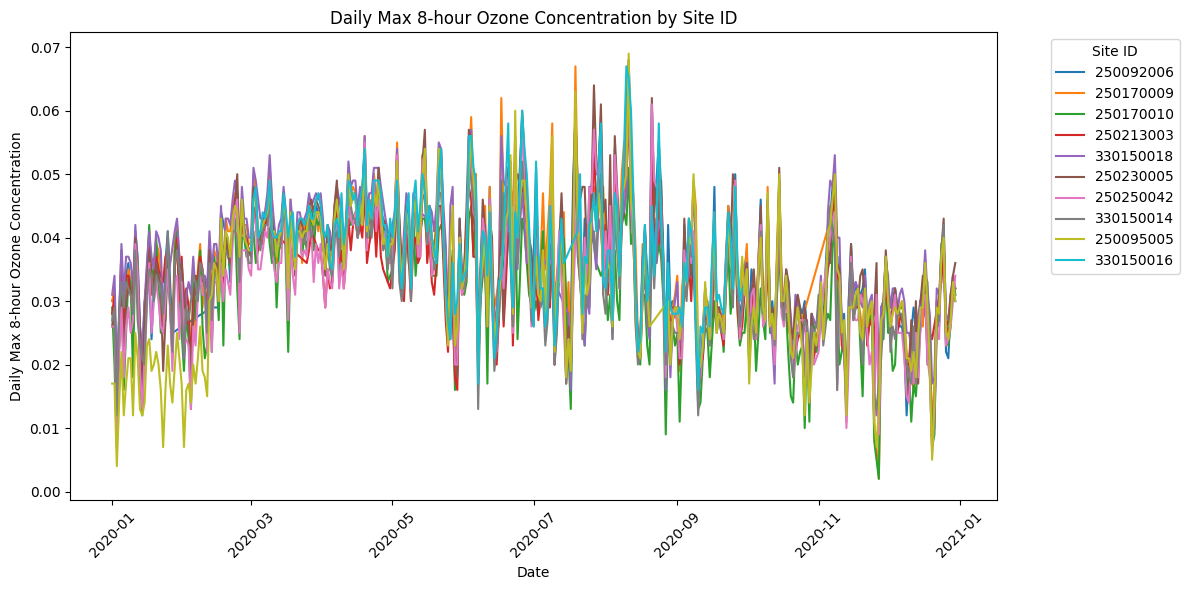

In [8]:
aq_ozone_2020['Date'] = pd.to_datetime(aq_ozone_2020['Date'])

# Sort the dataframe by 'Date' to ensure the plot is in chronological order
aq_ozone_2020.sort_values('Date', inplace=True)

# Create a color map based on 'Site ID'
unique_sites = aq_ozone_2020['Site ID'].unique()
color_map = {site: f'C{i}' for i, site in enumerate(unique_sites)}

# Plot the data
plt.figure(figsize=(12, 6))

for site, color in color_map.items():
    site_data = aq_ozone_2020[aq_ozone_2020['Site ID'] == site]
    plt.plot(site_data['Date'], site_data['Daily Max 8-hour Ozone Concentration'], 
             label=site, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour Ozone Concentration')
plt.title('Daily Max 8-hour Ozone Concentration by Site ID')
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Combine all dataframes into one
aq_ozone_combined = pd.concat(
    [aq_ozone_2016, aq_ozone_2017, aq_ozone_2018, aq_ozone_2019, aq_ozone_2020, 
     aq_ozone_2021, aq_ozone_2022, aq_ozone_2023, aq_ozone_2024],
    axis=0,  # Concatenate vertically (stack rows)
    ignore_index=True  # Reset the index in the combined dataframe
)

# Display the combined dataframe
print(aq_ozone_combined.head())

         Date Source    Site ID  POC  Daily Max 8-hour Ozone Concentration  \
0  01/01/2016    AQS  250092006    1                                 0.033   
1  01/02/2016    AQS  250092006    1                                 0.034   
2  01/03/2016    AQS  250092006    1                                 0.031   
3  01/04/2016    AQS  250092006    1                                 0.028   
4  01/05/2016    AQS  250092006    1                                 0.031   

  Units  Daily AQI Value             Local Site Name  Daily Obs Count  \
0   ppm               31  LYNN WATER TREATMENT PLANT               17   
1   ppm               31  LYNN WATER TREATMENT PLANT               17   
2   ppm               29  LYNN WATER TREATMENT PLANT               17   
3   ppm               26  LYNN WATER TREATMENT PLANT               17   
4   ppm               29  LYNN WATER TREATMENT PLANT               17   

   Percent Complete  ...  AQS Parameter Description Method Code  CBSA Code  \
0             

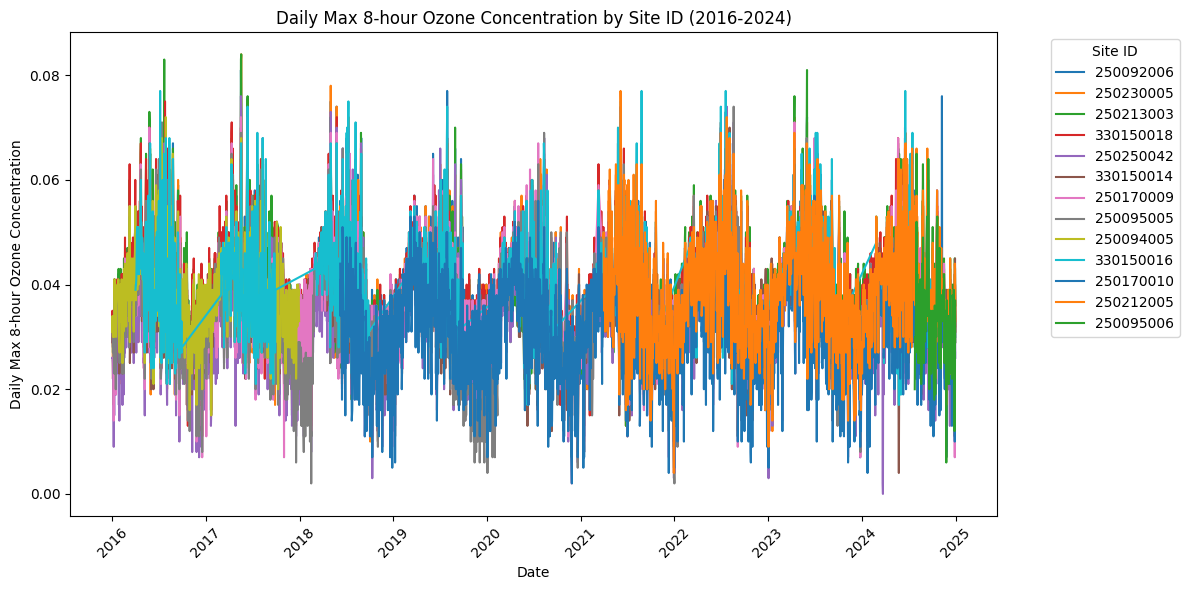

In [10]:
aq_ozone_combined['Date'] = pd.to_datetime(aq_ozone_combined['Date'])

# Sort the dataframe by 'Date' to ensure the plot is in chronological order
aq_ozone_combined.sort_values('Date', inplace=True)

# Create a color map based on 'Site ID'
unique_sites = aq_ozone_combined['Site ID'].unique()
color_map = {site: f'C{i}' for i, site in enumerate(unique_sites)}

# Plot the data
plt.figure(figsize=(12, 6))

for site, color in color_map.items():
    site_data = aq_ozone_combined[aq_ozone_combined['Site ID'] == site]
    plt.plot(site_data['Date'], site_data['Daily Max 8-hour Ozone Concentration'], 
             label=site, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour Ozone Concentration')
plt.title('Daily Max 8-hour Ozone Concentration by Site ID (2016-2024)')
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<h1> Bikeridership Data <h1>

In [ ]:
## City of Boston Bike Data
## test
bikeridership_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston'

#import files
bike_tract_2016_summer_file = (bikeridership_path + '/bike_tract_2016_summer.csv')
bike_tract_2016_fall_file = (bikeridership_path + '/bike_tract_2016_fall.csv')
bike_tract_2017_fall_file = (bikeridership_path + '/bike_tract_2017_fall.csv')
bike_tract_2018_summer_file = (bikeridership_path + '/bike_tract_2018_summer.csv')
bike_tract_2018_fall_file = (bikeridership_path + '/bike_tract_2018_fall.csv')
bike_tract_2019_summer_file = (bikeridership_path + '/bike_tract_2019_summer.csv')
bike_tract_2019_fall_file = (bikeridership_path + '/bike_tract_2019_fall.csv')
bike_tract_2020_summer_file = (bikeridership_path + '/bike_tract_2020_summer.csv')
bike_tract_2020_fall_file = (bikeridership_path + '/bike_tract_2020_fall.csv')
bike_tract_2020_spring_file = (bikeridership_path + '/bike_tract_2020_spring.csv')
bike_tract_2020_winter_file = (bikeridership_path + '/bike_tract_2020_winter.csv')
bike_tract_2021_summer_file = (bikeridership_path + '/bike_tract_2021_summer.csv')
bike_tract_2021_fall_file = (bikeridership_path + '/bike_tract_2021_fall.csv')
bike_tract_2021_spring_file = (bikeridership_path + '/bike_tract_2021_spring.csv')
bike_tract_2021_winter_file = (bikeridership_path + '/bike_tract_2021_winter.csv')
bike_tract_2022_summer_file = (bikeridership_path + '/bike_tract_2022_summer.csv')
bike_tract_2022_fall_file = (bikeridership_path + '/bike_tract_2022_fall.csv')
bike_tract_2022_spring_file = (bikeridership_path + '/bike_tract_2022_spring.csv')
bike_tract_2022_winter_file = (bikeridership_path + '/bike_tract_2022_winter.csv')
bike_tract_2023_summer_file = (bikeridership_path + '/bike_tract_2023_summer.csv')
bike_tract_2023_fall_file = (bikeridership_path + '/bike_tract_2023_fall.csv')
bike_tract_2023_spring_file = (bikeridership_path + '/bike_tract_2023_spring.csv')

In [ ]:
#census tracts linked to bike data
## All pd.read_csv() calls grouped together

#neighborhood
bike_tract_2016_summer = pd.read_csv(bike_tract_2016_summer_file)
bike_tract_2016_fall = pd.read_csv(bike_tract_2016_fall_file)

bike_tract_2017_fall = pd.read_csv(bike_tract_2017_fall_file)

#location
bike_tract_2018_summer = pd.read_csv(bike_tract_2018_summer_file)
bike_tract_2018_fall = pd.read_csv(bike_tract_2018_fall_file)

bike_tract_2019_summer = pd.read_csv(bike_tract_2019_summer_file)
bike_tract_2019_fall = pd.read_csv(bike_tract_2019_fall_file)

bike_tract_2020_summer = pd.read_csv(bike_tract_2020_summer_file)
bike_tract_2020_fall = pd.read_csv(bike_tract_2020_fall_file)
bike_tract_2020_spring = pd.read_csv(bike_tract_2020_spring_file)
bike_tract_2020_winter = pd.read_csv(bike_tract_2020_winter_file)

bike_tract_2021_summer = pd.read_csv(bike_tract_2021_summer_file)
bike_tract_2021_fall = pd.read_csv(bike_tract_2021_fall_file)
bike_tract_2021_spring = pd.read_csv(bike_tract_2021_spring_file)
bike_tract_2021_winter = pd.read_csv(bike_tract_2021_winter_file)

bike_tract_2022_summer = pd.read_csv(bike_tract_2022_summer_file)
bike_tract_2022_fall = pd.read_csv(bike_tract_2022_fall_file)
bike_tract_2022_spring = pd.read_csv(bike_tract_2022_spring_file)
bike_tract_2022_winter = pd.read_csv(bike_tract_2022_winter_file)

bike_tract_2023_summer = pd.read_csv(bike_tract_2023_summer_file)
bike_tract_2023_fall = pd.read_csv(bike_tract_2023_fall_file)
bike_tract_2023_spring = pd.read_csv(bike_tract_2023_spring_file)

In [18]:
## City of Boston Bike Data
# All _path and _file variables grouped together
bikeridership_2016_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston/bikeridership_boston_2016'
bikeridership_2017_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston/bikeridership_boston_2017'
bikeridership_2018_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston/bikeridership_boston_2018'
bikeridership_2019_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston/bikeridership_boston_2019'
bikeridership_2020_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston/bikeridership_boston_2020'
bikeridership_2021_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston/bikeridership_boston_2021'
bikeridership_2022_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston/bikeridership_boston_2022'
bikeridership_2023_path = '/mnt/c/Users/court/Documents/d3m_project/data/bikeridership/bikeridership_boston/bikeridership_boston_2023'

bikeridership_boston_2016_summer_file = (bikeridership_2016_path + '/bikeridership_boston_2016_summer.csv')
bikeridership_boston_2016_fall_file = (bikeridership_2016_path + '/bikeridership_boston_2016_fall.csv')

bikeridership_boston_2017_fall_file = (bikeridership_2017_path + '/bikeridership_boston_2017_fall.csv')

bikeridership_boston_2018_summer_file = (bikeridership_2018_path + '/bikeridership_boston_2018_summer.csv')
bikeridership_boston_2018_fall_file = (bikeridership_2018_path + '/bikeridership_boston_2018_fall.csv')

bikeridership_boston_2019_summer_file = (bikeridership_2019_path + '/bikeridership_boston_2019_summer.csv')
bikeridership_boston_2019_fall_file = (bikeridership_2019_path + '/bikeridership_boston_2019_fall.csv')

bikeridership_boston_2020_summer_file = (bikeridership_2020_path + '/bikeridership_boston_2020_summer.csv')
bikeridership_boston_2020_fall_file = (bikeridership_2020_path + '/bikeridership_boston_2020_fall.csv')
bikeridership_boston_2020_spring_file = (bikeridership_2020_path + '/bikeridership_boston_2020_spring.csv')
bikeridership_boston_2020_winter_file = (bikeridership_2020_path + '/bikeridership_boston_2020_winter.csv')

bikeridership_boston_2021_summer_file = (bikeridership_2021_path + '/bikeridership_boston_2021_summer.csv')
bikeridership_boston_2021_fall_file = (bikeridership_2021_path + '/bikeridership_boston_2021_fall.csv')
bikeridership_boston_2021_spring_file = (bikeridership_2021_path + '/bikeridership_boston_2021_spring.csv')
bikeridership_boston_2021_winter_file = (bikeridership_2021_path + '/bikeridership_boston_2021_winter.csv')

bikeridership_boston_2022_summer_file = (bikeridership_2022_path + '/bikeridership_boston_2022_summer.csv')
bikeridership_boston_2022_fall_file = (bikeridership_2022_path + '/bikeridership_boston_2022_fall.csv')
bikeridership_boston_2022_spring_file = (bikeridership_2022_path + '/bikeridership_boston_2022_spring.csv')
bikeridership_boston_2022_winter_file = (bikeridership_2022_path + '/bikeridership_boston_2022_winter.csv')

bikeridership_boston_2023_summer_file = (bikeridership_2023_path + '/bikeridership_boston_2023_summer.csv')
bikeridership_boston_2023_fall_file = (bikeridership_2023_path + '/bikeridership_boston_2023_fall.csv')
bikeridership_boston_2023_spring_file = (bikeridership_2023_path + '/bikeridership_boston_2023_spring.csv')


In [19]:
# All pd.read_csv() calls grouped together
bikeridership_boston_2016_summer = pd.read_csv(bikeridership_boston_2016_summer_file)
bikeridership_boston_2016_fall = pd.read_csv(bikeridership_boston_2016_fall_file)

bikeridership_boston_2017_fall = pd.read_csv(bikeridership_boston_2017_fall_file)

bikeridership_boston_2018_summer = pd.read_csv(bikeridership_boston_2018_summer_file)
bikeridership_boston_2018_fall = pd.read_csv(bikeridership_boston_2018_fall_file)

bikeridership_boston_2019_summer = pd.read_csv(bikeridership_boston_2019_summer_file)
bikeridership_boston_2019_fall = pd.read_csv(bikeridership_boston_2019_fall_file)

bikeridership_boston_2020_summer = pd.read_csv(bikeridership_boston_2020_summer_file)
bikeridership_boston_2020_fall = pd.read_csv(bikeridership_boston_2020_fall_file)
bikeridership_boston_2020_spring = pd.read_csv(bikeridership_boston_2020_spring_file)
bikeridership_boston_2020_winter = pd.read_csv(bikeridership_boston_2020_winter_file)

bikeridership_boston_2021_summer = pd.read_csv(bikeridership_boston_2021_summer_file)
bikeridership_boston_2021_fall = pd.read_csv(bikeridership_boston_2021_fall_file)
bikeridership_boston_2021_spring = pd.read_csv(bikeridership_boston_2021_spring_file)
bikeridership_boston_2021_winter = pd.read_csv(bikeridership_boston_2021_winter_file)

bikeridership_boston_2022_summer = pd.read_csv(bikeridership_boston_2022_summer_file)
bikeridership_boston_2022_fall = pd.read_csv(bikeridership_boston_2022_fall_file)
bikeridership_boston_2022_spring = pd.read_csv(bikeridership_boston_2022_spring_file)
bikeridership_boston_2022_winter = pd.read_csv(bikeridership_boston_2022_winter_file)

bikeridership_boston_2023_summer = pd.read_csv(bikeridership_boston_2023_summer_file)
bikeridership_boston_2023_fall = pd.read_csv(bikeridership_boston_2023_fall_file)
bikeridership_boston_2023_spring = pd.read_csv(bikeridership_boston_2023_spring_file)